# Comparación de modelos de regresión

El objetivo de este proyecto es comparar el rendimiento de diferentes técnicas de regresión, incluyendo la regresión por bosque aleatorio, la regresión lineal y las redes neuronales. Se evaluarán métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para determinar cuál modelo se ajusta mejor a un conjunto de datos específico. Queremos predecir el valor medio de una casa en una zona dada.

### Ojo:

En este notebook sólamente vamos a hacer un vistazo los datos, para ver cómo están distribuidos y qué variables podemos usar. La regresión como tal está en los demás notebooks.

In [10]:
# Importamos las librerias necesarias
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Dataset a utilizar

Para hacer las comparaciones entre diferentes tipos de regresión, vamos a estar utilizando un dataset de prueba que está disponible en la libreria scikit-learn.

Este dataset contiene información acerca del mercado de finca raíz en California en los años 90.

In [11]:
# Asignamos el dataset a la variable "housing"
df = fetch_california_housing(as_frame=True)
df = df.frame

El feature "MedHouseVal" está en cientos de miles de dólares, y "MedInc" en decenas de miles de dólares.

In [12]:
# Vemos las primeras 5 filas del dataset y comprobamos que importó correctamente
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Abajo podemos ver que el dataset está compuesto de 9 features y 20640 registros (filas). Esta es una cantidad de registros aceptable para construir modelos de predicción.

In [13]:
df.shape

(20640, 9)

Haciendo un histograma por cada feature del dataset, se evidencia que cada uno está distribuido de manera diferente.

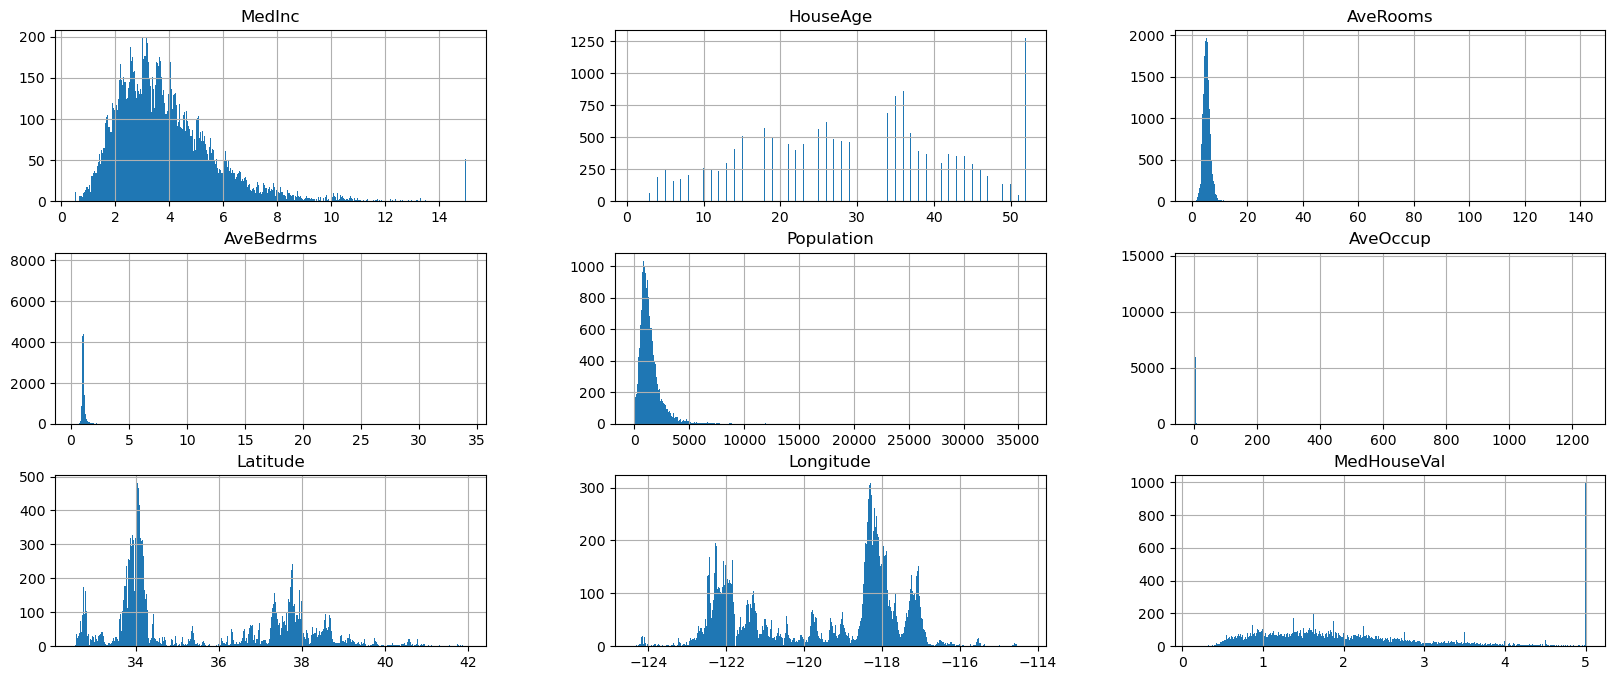

In [14]:
df.hist(bins=500, figsize=(20,8))
plt.show()

En la matriz de dispersión se evidencia que, respecto al valor medio de las casas (en la última fila de la visualización) el único feature que tiene una tendencia lineal es "MedInc".

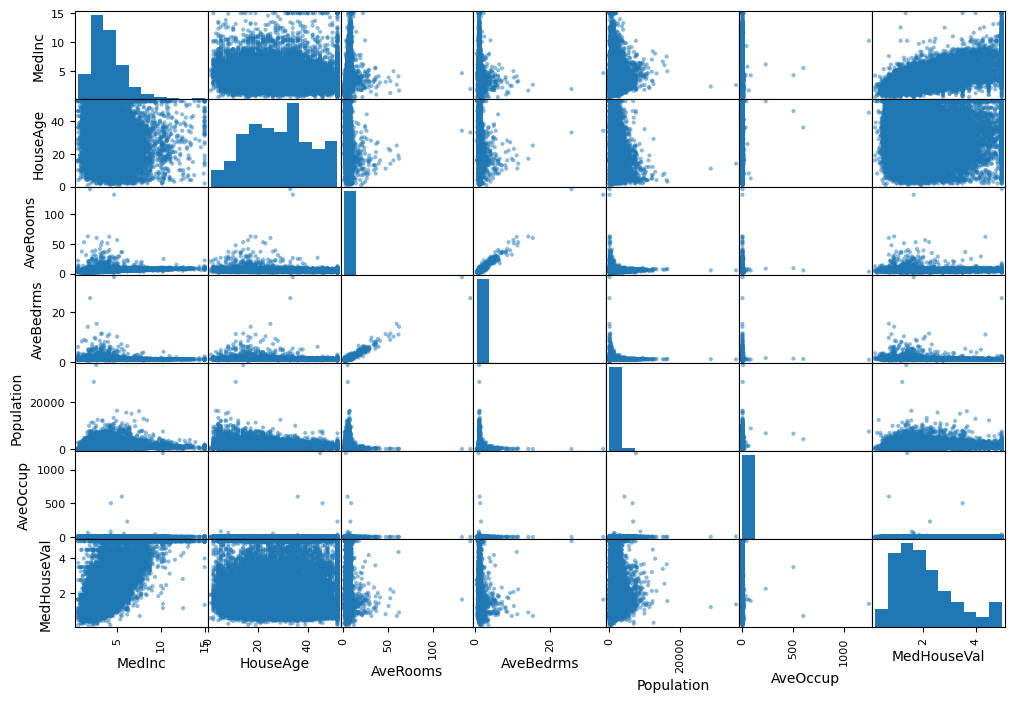

In [15]:
# Hacemos una matriz de dispersión de todos los features
attributes = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup','MedHouseVal']
scatter_matrix(df[attributes], figsize=(12,8))
plt.show()

Obteniendo la correlación entre columnas, se verifica que "MedInc" tiene la correlación más alta respecto a "MedHouseVal".

In [16]:
# Utilizamos la función corr() para obtener la correlación de cada columna respecto a "MedHouseVal"
corr = df.corr()
corr['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

In [17]:
# Comprobamos que no hayan valores nulos en el dataset
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [18]:
# Verificamos que no hayan variables categóricas
df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

# Paso a seguir
Teniendo todo esto en cuenta, en los siguientes notebooks procederemos a realizar puntualmente los diferentes tipos de regresiones.